**Step 1:** Import the libraries, load dataset, print shape of data, data description

In [233]:
# Import necessary libraries.
import re, string, unicodedata
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import nltk           
                        
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

from bs4 import BeautifulSoup                 
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords, wordnet    
from nltk.stem import LancasterStemmer, WordNetLemmatizer

import warnings
warnings.filterwarnings('ignore')


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/ganeshbalusait/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ganeshbalusait/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/ganeshbalusait/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [234]:
dataset = pd.read_csv('Tweets.csv')


In [235]:
pd.set_option('display.max_colwidth',None)

In [236]:
dataset.head()


,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials to the experience... tacky.,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I need to take another trip!,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,"@VirginAmerica it's really aggressive to blast obnoxious ""entertainment"" in your guests' faces &amp; they have little recourse",NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing about it,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [237]:
dataset.shape

(14640, 15)

In [238]:
dataset.describe()

,tweet_id,airline_sentiment_confidence,negativereason_confidence,retweet_count
count,1.464000e+04,14640.000000,10522.000000,14640.000000
mean,5.692184e+17,0.900169,0.638298,0.082650
std,7.791112e+14,0.162830,0.330440,0.745778
min,5.675883e+17,0.335000,0.000000,0.000000
25%,5.685592e+17,0.692300,0.360600,0.000000
50%,5.694779e+17,1.000000,0.670600,0.000000
75%,5.698905e+17,1.000000,1.000000,0.000000
max,5.703106e+17,1.000000,1.000000,44.000000


In [239]:
dataset.isnull().sum()

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64

**Step 2:** Understand of data-columns:  
         1. Drop all other columns except “text” and “airline_sentiment”.  
         2. Check the shape of data.  
         3. Print first 5 rows of data.

In [240]:
dataset = dataset.reindex(np.random.permutation(dataset.index))
dataset.reset_index(inplace=True)
dataset.drop('index',inplace=True, axis=1)
dataset = dataset[['text','airline_sentiment']]
dataset.head()

,text,airline_sentiment
0,"@united Awesome flight crew on UA1589, re the plane, the Jurassic period called and they want their dinosaur/plane back!",negative
1,"@AmericanAir if I've booked an AA award on USAir metal, and space opens up on AA metal, can I change to the AA flight without fees?",neutral
2,@SouthwestAir RDU flights expected to be ok this afternoon and tonight?,neutral
3,@AmericanAir how about some rampers at gate b40 dfw? Waiting to be marshaled in,negative
4,@united I unfortunately didn't get her name :( she was not nice!,negative


In [241]:
dataset.shape

(14640, 2)

In [242]:
# first 5 text

text=dataset['text']
text[0:5]

0             @united Awesome flight crew on UA1589, re the plane,  the  Jurassic period called and they want their dinosaur/plane back!
1    @AmericanAir if I've booked an AA award on USAir metal, and space opens up on AA metal, can I change to the AA flight without fees?
2                                                                @SouthwestAir RDU flights expected to be ok this afternoon and tonight?
3                                                      @AmericanAir how about some rampers at gate b40 dfw?   Waiting to be marshaled in
4                                                                       @united I unfortunately didn't get her name :( she was not nice!
Name: text, dtype: object

In [243]:
# total number of negative, netural, positive

airline_sentiment= dataset['airline_sentiment'].value_counts()
airline_sentiment

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64

Text(0.5, 0, 'Sentiment expressed in tweets')

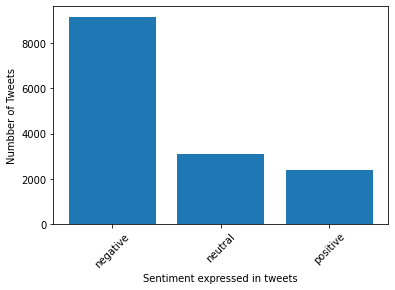

In [244]:
Index = [1,2,3]
plt.bar(Index,dataset.airline_sentiment.value_counts())
plt.xticks(Index,['negative','neutral','positive'],rotation=45)
plt.ylabel('Numbber of Tweets')
plt.xlabel('Sentiment expressed in tweets')

**Step 3:** Text pre-processing: Data preparation. (20 Marks)
    1. Html tag removal.
    2. Tokenization.
    3. Remove the numbers.
    4. Removal of Special Characters and Punctuations.
    5. Conversion to lowercase.
    6. Lemmatize or stemming.
    7. Join the words in the list to convert back to text string in the dataframe. (So that each row contains the     data in text format.)
    8. Print first 5 rows of data after pre-processing.

In [245]:
dataset['text'][2]

'@SouthwestAir RDU flights expected to be ok this afternoon and tonight?'

In [246]:
text[:]

0                 @united Awesome flight crew on UA1589, re the plane,  the  Jurassic period called and they want their dinosaur/plane back!
1        @AmericanAir if I've booked an AA award on USAir metal, and space opens up on AA metal, can I change to the AA flight without fees?
2                                                                    @SouthwestAir RDU flights expected to be ok this afternoon and tonight?
3                                                          @AmericanAir how about some rampers at gate b40 dfw?   Waiting to be marshaled in
4                                                                           @united I unfortunately didn't get her name :( she was not nice!
                                                                        ...                                                                 
14635                                             @AmericanAir I'm not sure what happened to my USAirways status when the merger took place.
14636        

In [247]:
example1 = BeautifulSoup(dataset["text"][0], "html.parser")
example1.get_text()

'@united Awesome flight crew on UA1589, re the plane,  the  Jurassic period called and they want their dinosaur/plane back!'

In [248]:
# Token

for i, row in dataset.iterrows():
    text = dataset.at[i, 'text']
    words = nltk.word_tokenize(text)
    dataset.at[i, 'text'] = words
dataset.head()

,text,airline_sentiment
0,"[@, united, Awesome, flight, crew, on, UA1589, ,, re, the, plane, ,, the, Jurassic, period, called, and, they, want, their, dinosaur/plane, back, !]",negative
1,"[@, AmericanAir, if, I, 've, booked, an, AA, award, on, USAir, metal, ,, and, space, opens, up, on, AA, metal, ,, can, I, change, to, the, AA, flight, without, fees, ?]",neutral
2,"[@, SouthwestAir, RDU, flights, expected, to, be, ok, this, afternoon, and, tonight, ?]",neutral
3,"[@, AmericanAir, how, about, some, rampers, at, gate, b40, dfw, ?, Waiting, to, be, marshaled, in]",negative
4,"[@, united, I, unfortunately, did, n't, get, her, name, :, (, she, was, not, nice, !]",negative


In [249]:
# save the stopwords in a list named stopwords.
stopwords = stopwords.words('english')
stopwords

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [250]:
def remove_non_ascii(words):
    """Remove non-ASCII characters from list of tokenized words"""
    new_words = []                        # Create empty list to store pre-processed words.
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)        # Append processed words to new list.
    return new_words
remove_non_ascii(words)

['@',
 'USAirways',
 'i',
 'dont',
 'need',
 'to',
 'check',
 'status',
 'of',
 'my',
 'flight',
 'because',
 'i',
 'was',
 'ON',
 'the',
 'plane',
 'and',
 'you',
 'had',
 'a',
 'door',
 'malfunction',
 '.',
 'Get',
 'it',
 'together',
 '!',
 '!']

In [253]:
def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    new_words = []                        # Create empty list to store pre-processed words.
    for word in words:
        new_word = word.lower()           # Converting to lowercase
        new_words.append(new_word)        # Append processed words to new list.
    return new_words

In [254]:
def remove_punctuation(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []                        # Create empty list to store pre-processed words.
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_words.append(new_word)    # Append processed words to new list.
    return new_words

In [255]:
def remove_stopwords(words):
    """Remove stop words from list of tokenized words"""
    new_words = []                        # Create empty list to store pre-processed words.
    for word in words:
        if word not in stopwords:
            new_words.append(word)# Append processed words to new list.
            
    return new_words

In [256]:
def stem_words(words):
    """Stem words in list of tokenized words"""
    stemmer = LancasterStemmer()
    stems = []                            # Create empty list to store pre-processed words.
    for word in words:
        stem = stemmer.stem(word)
        stems.append(stem)                # Append processed words to new list.
    return stems

In [257]:
def lemmatize_verbs(words):
    """Lemmatize verbs in list of tokenized words"""
    lemmatizer = WordNetLemmatizer()
    lemmas = []                           # Create empty list to store pre-processed words.
    for word in words:
        lemma = lemmatizer.lemmatize(word, pos='v')
        lemmas.append(lemma)              # Append processed words to new list.
    return lemmas

In [258]:
def normalize(words):
    words = remove_non_ascii(words)
    words = to_lowercase(words)
    words = remove_punctuation(words)
    words = remove_stopwords(words)
    #words = remove_stopwords(words)
    return words

In [259]:
# Iterate the normalize funtion over whole data.
for i, row in dataset.iterrows():
    words = dataset.at[i, 'text']
    words = normalize(words)
    dataset.at[i,'text'] = words
dataset.head()

,text,airline_sentiment
0,"[united, awesome, flight, crew, ua1589, plane, jurassic, period, called, want, dinosaurplane, back]",negative
1,"[americanair, booked, aa, award, usair, metal, space, opens, aa, metal, change, aa, flight, without, fees]",neutral
2,"[southwestair, rdu, flights, expected, ok, afternoon, tonight]",neutral
3,"[americanair, rampers, gate, b40, dfw, waiting, marshaled]",negative
4,"[united, unfortunately, nt, get, name, nice]",negative


In [260]:
# Lemmatize and stemming

def stem_and_lemmatize(words):
    stems = stem_words(words)
    lemmas = lemmatize_verbs(words)
    return (" ".join(stems)), (" ".join(lemmas))

In [261]:
dataset['lemma'] = ''
dataset['stem'] = ''

for i, row in dataset.iterrows():
    words = dataset.at[i, 'text']
    stems, lemmas = stem_and_lemmatize(words)
    dataset.at[i,'stem'] = stems
    dataset.at[i, 'lemma'] = lemmas
dataset.head()

,text,airline_sentiment,lemma,stem
0,"[united, awesome, flight, crew, ua1589, plane, jurassic, period, called, want, dinosaurplane, back]",negative,unite awesome flight crew ua1589 plane jurassic period call want dinosaurplane back,unit awesom flight crew ua1589 plan jurass period cal want dinosaurpl back
1,"[americanair, booked, aa, award, usair, metal, space, opens, aa, metal, change, aa, flight, without, fees]",neutral,americanair book aa award usair metal space open aa metal change aa flight without fee,americanair book aa award usair met spac op aa met chang aa flight without fee
2,"[southwestair, rdu, flights, expected, ok, afternoon, tonight]",neutral,southwestair rdu flight expect ok afternoon tonight,southwestair rdu flight expect ok afternoon tonight
3,"[americanair, rampers, gate, b40, dfw, waiting, marshaled]",negative,americanair rampers gate b40 dfw wait marshal,americanair ramp gat b40 dfw wait marsh
4,"[united, unfortunately, nt, get, name, nice]",negative,unite unfortunately nt get name nice,unit unfortun nt get nam nic


**step 4:** Vectorization:
    1. Use CountVectorizer.
    2. Use TfidfVectorizer.

In [262]:
from sklearn.feature_extraction.text import CountVectorizer


In [263]:
dataset.head()

,text,airline_sentiment,lemma,stem
0,"[united, awesome, flight, crew, ua1589, plane, jurassic, period, called, want, dinosaurplane, back]",negative,unite awesome flight crew ua1589 plane jurassic period call want dinosaurplane back,unit awesom flight crew ua1589 plan jurass period cal want dinosaurpl back
1,"[americanair, booked, aa, award, usair, metal, space, opens, aa, metal, change, aa, flight, without, fees]",neutral,americanair book aa award usair metal space open aa metal change aa flight without fee,americanair book aa award usair met spac op aa met chang aa flight without fee
2,"[southwestair, rdu, flights, expected, ok, afternoon, tonight]",neutral,southwestair rdu flight expect ok afternoon tonight,southwestair rdu flight expect ok afternoon tonight
3,"[americanair, rampers, gate, b40, dfw, waiting, marshaled]",negative,americanair rampers gate b40 dfw wait marshal,americanair ramp gat b40 dfw wait marsh
4,"[united, unfortunately, nt, get, name, nice]",negative,unite unfortunately nt get name nice,unit unfortun nt get nam nic


In [264]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(max_features=5000, lowercase=False)# Too many  number of features will increase the processing time.
data_features = vectorizer.fit_transform(dataset['lemma'])
#print(dataset.lemma)

data_features = data_features.toarray()                        # Convert the data features to array.

X = data_features
print(X)

#y = data.target column

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [265]:
y=dataset.rename(columns={'airline_sentiment':'labels'},inplace=True)
y=dataset[['labels']]
y.head()

,labels
0,negative
1,neutral
2,neutral
3,negative
4,negative


In [266]:
y.loc[:,'sentiment'] = dataset.labels.map({'negative':0,'neutral':2,'positive':1})
y = y.drop(['labels'],axis=1)
y.head()

,sentiment
0,0
1,2
2,2
3,0
4,0


In [267]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [268]:
# Using Random Forest to build model for the classification of reviews.
# Also calculating the cross validation score.

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

forest = RandomForestClassifier(n_estimators=10, n_jobs=4)

forest = forest.fit(X_train, y_train)

print(forest)

print(np.mean(cross_val_score(forest, data_features, y, cv=10)))

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=4,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
0.7455619760386842


In [269]:
# Predict the result for test data using the model built above.

result = forest.predict(X_test)
result

array([0, 0, 0, ..., 0, 2, 0])

In [272]:
y_test

,sentiment
4794,0
10480,2
8067,0
8880,1
8292,1
...,...
12156,1
6518,2
2245,0
4165,0


[[2390   92  263]
 [ 176  421  102]
 [ 413  107  428]]


<AxesSubplot:>

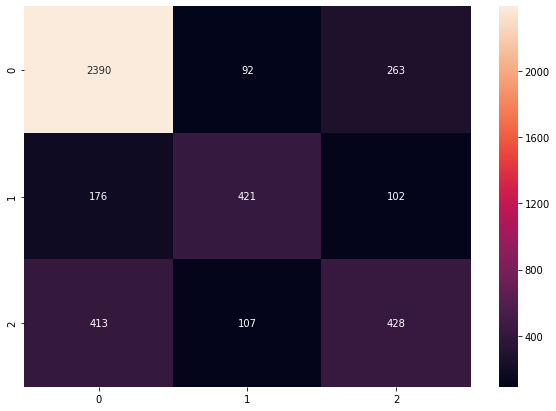

In [273]:
# Print and plot Confusion matirx to get an idea of how the distribution of the prediction is, among all the classes.

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, result)

print(conf_mat)

df_cm = pd.DataFrame(conf_mat, index = [i for i in "012"],
                  columns = [i for i in "012"])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='g')

In [274]:
# Using TfidfVectorizer to convert text data to numbers.

from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(max_features=5000, lowercase=False)# Too many  number of features will increase the processing time.
data_features = vectorizer.fit_transform(dataset['lemma'])
#print(dataset.lemma)

data_features = data_features.toarray()                        # Convert the data features to array.

X = data_features
print(X)


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [275]:
# Using Random Forest to build model for the classification of reviews.
# Also calculating the cross validation score.

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

forest = RandomForestClassifier(n_estimators=10, n_jobs=4)

forest = forest.fit(X_train, y_train)

print(forest)

print(np.mean(cross_val_score(forest, data_features, y, cv=10)))

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=4,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
0.750616155104184


In [276]:
# Predict the result for test data using the model built above.

result = forest.predict(X_test)
result

array([2, 0, 0, ..., 0, 2, 0])

[[2412   67  266]
 [ 216  380  103]
 [ 418   90  440]]


<AxesSubplot:>

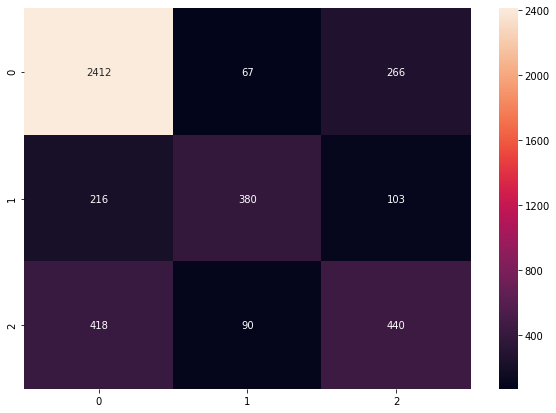

In [277]:
# Print and plot Confusion matirx to get an idea of how the distribution of the prediction is, among all the classes.

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, result)

print(conf_mat)

df_cm = pd.DataFrame(conf_mat, index = [i for i in "012"],
                  columns = [i for i in "012"])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='g')

**Summary:**

*  We used dataset which has reviews in text format and their sentiment score on the scale of 0 to 2.
* The goal was to build a model for text-classification.
* We Pre-processed the data using variuos techniques and libraries.
* The pre-precessed data is converted to numbers, so that we can feed the data in the model.
* After building the classification model, we predicted the result for the test data.
* After that we saw that using the above techniques, our model performed good in perspective of how the text classification models perform.
* However, we can still increase the accuracy of our model by increasing the dataset we took into account for the model building (As the time was constraint here so we only used 50000 entries out of around 500000 entries, which means we built our model using 10% of dataset.)
* One more way to increase accuracy is to use different variations of Pre-processing techniques.
* CountVectorizer technique is given 75% accuracy.